<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Demostration of Gradient Descent using R:</p><br>
<p style="font-family: Arial; font-size:2.25em;color:green; font-style:bold"><br>
Kumar Rahul</p><br>


In this exercise, we will use the German Credit Rating data to demostrate Gradient Descent Algorithm.The Dataset can be dowloaded from:

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

# Code starts here
We are going to use below mentioned libraries for demonstrating plot the cost function:

In [1]:
library(ggplot2)


## Data Import and Manipulation

### 1. Import a data set

In [2]:
raw_data <- read.csv("/Users/Rahul/Documents/Datasets/german_credit_rating_data 2010.csv", 
                     header = TRUE,sep = ",",na.strings = c(""," ", "NA"))

filter_data <- raw_data
filter_data <- raw_data[complete.cases(raw_data),]
filter_data <- raw_data[,c(-1)]

### 2. Create dummy variable for factors

In [3]:
n <- ncol(filter_data)
#for creating X0 variable
processed_data <- cbind(rep(1, nrow(filter_data)))
for (i in 1:n ) {
  if (is.factor(filter_data[,i])) {
    #creating dummies for the factors and storing in temp
    temp <- model.matrix(~filter_data[,i])
    #removing the first column which is an intercept term in dummy coding
    temp <- subset(temp, select = -c(1) )
    #loop through to rename the column names appropriately
      for (c in 1:ncol(temp)) {
        str <- colnames(temp)[c]
        colnames(temp)[c] <- sub("filter_data\\[, i\\]"," ",colnames(temp)[c])
        colnames(temp)[c] <- paste(colnames(filter_data)[i], "- ", colnames(temp)[c])
      }
    #the factors after dummy variable creation is appeneded to the processed_data
    processed_data <- cbind(processed_data,temp)
  }
  #in case not a factor, store the variable in processed_data directly
  else {
    processed_data <- cbind(processed_data,filter_data[,i])
    len <- ncol(processed_data)
    colnames(processed_data)[len] <- colnames(filter_data[i])
    
    #standardize the numeric variable for faster descent. (Feature scaling)
    processed_data[,len] <- scale(processed_data[,len])
  }
}

### 3. Seperate x and y variable and converting to matrix form

In [4]:
x <- processed_data
y <- as.matrix(x[,ncol(x)])
colnames(y)[1] <- colnames(x)[ncol(x)]
x <- x[,c(-ncol(x))]
colnames(x)[1] <- "X0"
x <- as.matrix(x)

## Create functions

### 1. Define Sigmoid function

In [5]:
sigmoid <- function(z) {
1/(1 + exp(-z))
}

### 2. Define Hypothesis function

In [6]:
hypothesisLr <- function(theta, x) {
sigmoid(x %*% theta) #matrix multiplication (x is 1000*75 and theta is 75*1, result 75*1)
}

### 3. Define Cost function

In [7]:
computeCost <- function(theta, x, y) {
m <- length(y)
s <- sapply(1:m, function(i)
y[i]*log(hypothesisLr(theta,x[i,])) + (1 - y[i])*log(1 - hypothesisLr(theta,x[i,]))
)
j <- -1/m * sum(s)
return(j)
}

### 4. Define Gradient Descent function

In [8]:
gradAlgo <- function(theta, x, y) {
  m <- length(y)
  g <- 1/m * t(x) %*% (hypothesisLr(theta,x) - y)
  return(g)
}

## Call functions


### 1. Initialize $\alpha, \theta$ and compute cost 

Run normal gradient descent to compute theta and cost function J for each iteration

In [9]:
alpha <- 1 #learning rate 1
iter <- 1000 #no of interations for descent 5000
#m <- length(y)
theta <- rep(0, ncol(x))

#cost at intial theta
computeCost(theta, x, y)
j <- rep(0,iter) #to maintain log of cost
for (c in 1:iter) {
  theta <- theta - alpha * gradAlgo(theta,x,y)
  j[c] <- computeCost(theta,x,y)
}

[1] 0.6931472

### 2. Plot Cost Value

Plot cost as a function of no of iterations to converge

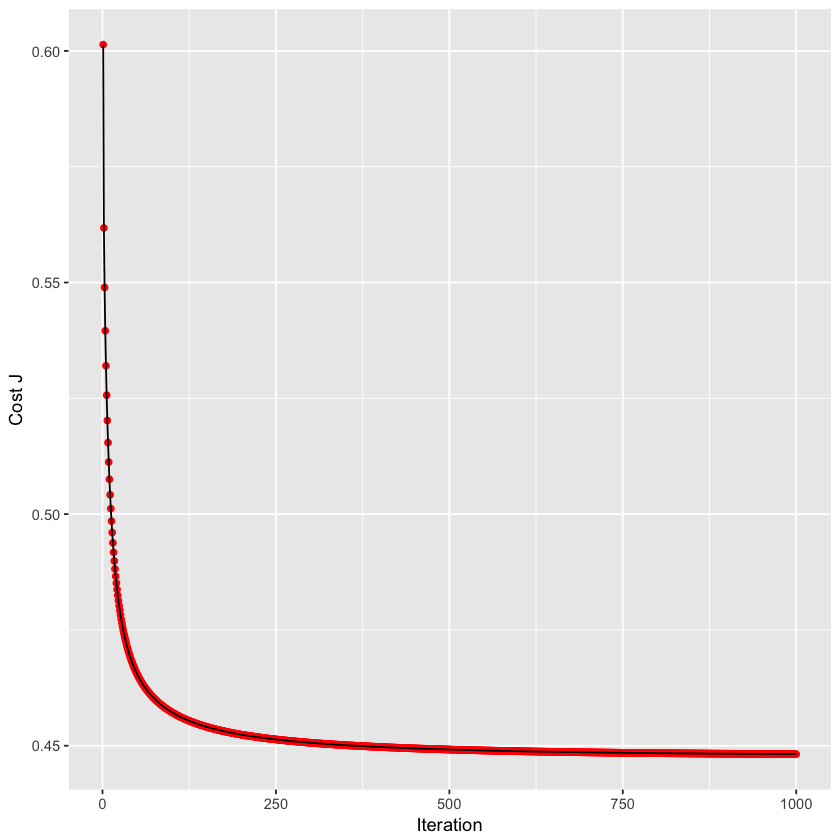

In [10]:
ggplot() +
  aes(x = 1:iter, y = j) +
  geom_point(colour = "red") +
  geom_path() + xlab("Iteration") +
  ylab("Cost J")

### 3. Build Classfication matrix


In [11]:
m <- nrow(y)
actual_y <- y
actual_y[actual_y == 0] <- "Bad"
actual_y[actual_y == 1] <- "Good"
predicted_y = rep("Bad", m);
predicted_y[hypothesisLr(theta,x) >= 0.5] = "Good";
addmargins(table(actual_y, predicted_y))

,Bad,Good,Sum
Bad,158,142,300
Good,73,627,700
Sum,231,769,1000


### 4. Score new cases

Scoring new profile pass all X's

In [12]:
#new_score <- (sigmoid(c(1,<all X's>) %*% theta))

## Compare the Gradient Descent with GLM



In [13]:
lg_glm <- glm(filter_data$Credit.classification ~ .,data = filter_data, family = "binomial")
summary(lg_glm)
lg_predict_prob <- predict(lg_glm, filter_data[,1:20],"response")
m <- length(filter_data[,21])
actual_y <- filter_data[,21]

predicted_y = rep("Bad", m);
predicted_y[lg_predict_prob >= 0.5] = "Good";
addmargins(table(actual_y, predicted_y))


Call:
glm(formula = filter_data$Credit.classification ~ ., family = "binomial", 
    data = filter_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6116  -0.7095   0.3752   0.6994   2.3410  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        2.353e+00  1.330e+00   1.769 0.076938 .  
CHK_ACCTless-200DM                 3.749e-01  2.179e-01   1.720 0.085400 .  
CHK_ACCTno-account                 1.712e+00  2.322e-01   7.373 1.66e-13 ***
CHK_ACCTover-200DM                 9.657e-01  3.692e-01   2.616 0.008905 ** 
Duration                          -2.786e-02  9.296e-03  -2.997 0.002724 ** 
History bank-paid-duly            -1.434e-01  5.489e-01  -0.261 0.793921    
History critical                   1.436e+00  4.399e-01   3.264 0.001099 ** 
History delay                      8.532e-01  4.717e-01   1.809 0.070470 .  
History duly-till-now              5.861e-01  4.305e-01   1.362 0.173348

,Bad,Good,Sum
bad.,160,140,300
good.,74,626,700
Sum,234,766,1000




#### End of Document

***
***
